Loading data...
Splitting data...
Performing Grid Search...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .................estimator__C=0.1;, score=-0.536 total time=   0.0s
[CV 2/5] END .................estimator__C=0.1;, score=-0.153 total time=   0.0s
[CV 3/5] END .................estimator__C=0.1;, score=-0.136 total time=   0.0s
[CV 4/5] END .................estimator__C=0.1;, score=-0.220 total time=   0.0s
[CV 5/5] END .................estimator__C=0.1;, score=-0.088 total time=   0.0s
[CV 1/5] END ...................estimator__C=1;, score=-0.538 total time=   0.0s
[CV 2/5] END ...................estimator__C=1;, score=-0.160 total time=   0.0s
[CV 3/5] END ...................estimator__C=1;, score=-0.143 total time=   0.0s
[CV 4/5] END ...................estimator__C=1;, score=-0.201 total time=   0.0s
[CV 5/5] END ...................estimator__C=1;, score=-0.072 total time=   0.0s
[CV 1/5] END ..................estimator__C=10;, score=-0.536 total ti

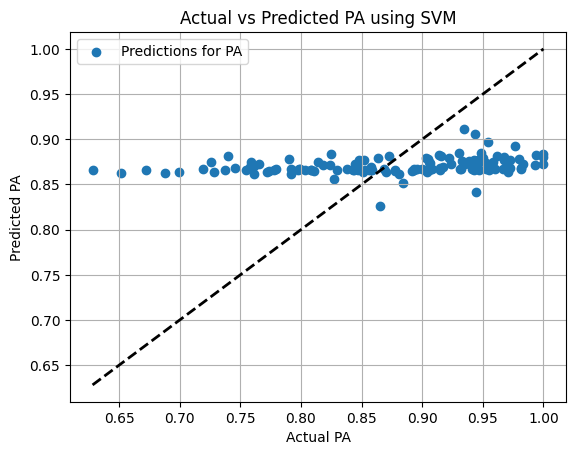

Mean Squared Error for IoU: 0.02


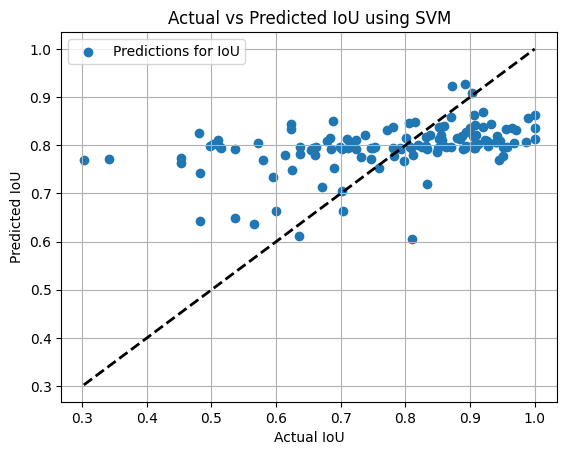

Mean Squared Error for DSC: 0.01


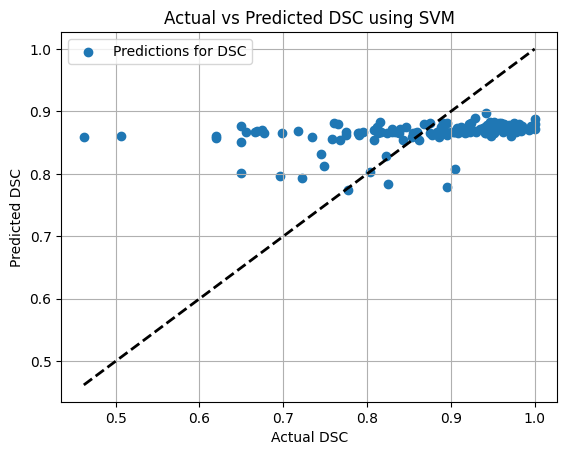

Mean Squared Error for MSE: 0.01


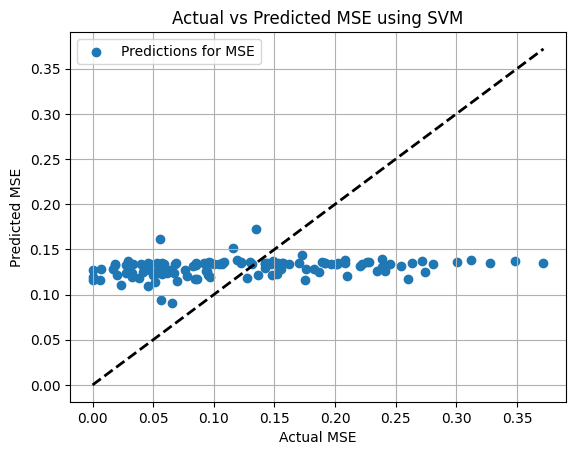

Mean Squared Error for NHD: 0.00


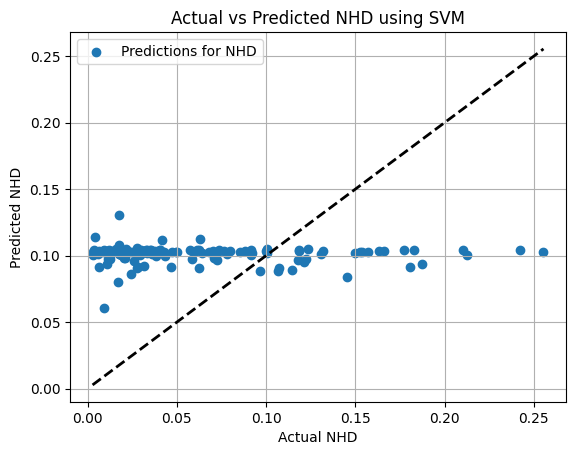

Model saved to: E:\A files\Master\Dissertation\ML\SVM\SVM_best.pkl


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import joblib

# Load data
print("Loading data...")
data_path = r"E:\A files\Master\Dissertation\ML\dataset.csv"
data = pd.read_csv(data_path)

# Splitting the data into features (X) and targets (y)
X = data.drop(columns=['sample', 'PA', 'IoU', 'DSC', 'MSE', 'NHD'])
y = data[['PA', 'IoU', 'DSC', 'MSE', 'NHD']]

# Split data into training and testing sets
print("Splitting data...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Parameters to be considered for GridSearch
parameters = {'estimator__C': [0.1, 1, 10]}

# Create an SVR model
model = SVR()

# Create a MultiOutputRegressor
multi_model = MultiOutputRegressor(model)

# Grid Search with Cross Validation
print("Performing Grid Search...")
grid_search = GridSearchCV(multi_model, parameters, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
print("Best Parameters found: ", grid_search.best_params_)

# Train the model using best parameters
print("Training the model...")
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Save the trained model
print("Saving the model...")
save_path = r"E:\A files\Master\Dissertation\ML\SVM\SVM_best.pkl"
joblib.dump(best_model, save_path)

# Predict on the test set
print("Making predictions...")
y_pred = best_model.predict(X_test)

# Output names
outputs = ['PA', 'IoU', 'DSC', 'MSE', 'NHD']

# Calculate and print the Mean Squared Error for each output
print("Calculating Mean Squared Error...")
for i, output in enumerate(outputs):
    mse = mean_squared_error(y_test[output], y_pred[:, i])
    print(f"Mean Squared Error for {output}: {mse:.2f}")

    # Visualization
    plt.scatter(y_test[output], y_pred[:, i], label=f'Predictions for {output}')
    plt.plot([y_test[output].min(), y_test[output].max()], [y_test[output].min(), y_test[output].max()], 'k--', lw=2)
    plt.xlabel(f'Actual {output}')
    plt.ylabel(f'Predicted {output}')
    plt.title(f'Actual vs Predicted {output} using SVM')
    plt.legend()
    plt.grid(True)
    
    # Save the plot as a .jpg file
    plot_save_path = r"E:\A files\Master\Dissertation\ML\SVM\SVM_" + output + "_best.jpg"
    plt.savefig(plot_save_path, format='jpg')

    plt.show()

print(f"Model saved to: {save_path}")